<a href="https://colab.research.google.com/github/elichen/aoc2024/blob/main/Day_15_Warehouse_Woes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
input = """##########
#..O..O.O#
#......O.#
#.OO..O.O#
#..O@..O.#
#O#..O...#
#O..O..O.#
#.OO.O.OO#
#....O...#
##########

<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^
vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v
><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<
<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^
^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><
^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^
>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^
<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>
^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>
v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^^^"""

In [2]:
input = open("input.txt").read()

In [3]:
def calculate_box_scores(grid):
    total_score = 0
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 'O':
                # i is distance from top, j is distance from left
                score = 100 * i + j
                total_score += score
    return total_score

def simulate_push_boxes(input_str):
    # Previous parsing and simulation code remains the same
    lines = input_str.strip().split('\n')
    empty_line_idx = lines.index('')

    grid = [list(line) for line in lines[:empty_line_idx]]
    actions = ''.join(lines[empty_line_idx + 1:])

    # Find starting position of @
    start_pos = None
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == '@':
                start_pos = (i, j)
                break
        if start_pos:
            break

    moves = {
        '^': (-1, 0),
        'v': (1, 0),
        '<': (0, -1),
        '>': (0, 1)
    }

    curr_pos = start_pos

    for action in actions:
        if action not in moves:
            continue

        dy, dx = moves[action]
        new_y, new_x = curr_pos[0] + dy, curr_pos[1] + dx

        if grid[new_y][new_x] == '#':
            continue

        if grid[new_y][new_x] == '.':
            grid[curr_pos[0]][curr_pos[1]] = '.'
            grid[new_y][new_x] = '@'
            curr_pos = (new_y, new_x)
            continue

        if grid[new_y][new_x] == 'O':
            boxes_to_move = []
            check_y, check_x = new_y, new_x
            while grid[check_y][check_x] == 'O':
                boxes_to_move.append((check_y, check_x))
                check_y, check_x = check_y + dy, check_x + dx

            if grid[check_y][check_x] == '#':
                continue

            grid[check_y][check_x] = 'O'
            grid[curr_pos[0]][curr_pos[1]] = '.'
            grid[new_y][new_x] = '@'
            curr_pos = (new_y, new_x)

    # Calculate final score
    return calculate_box_scores(grid)


simulate_push_boxes(input)

1552463

In [4]:
def transform_map(input_str):
    # Split input into map and actions
    lines = input_str.strip().split('\n')
    empty_line_idx = lines.index('')
    map_lines = lines[:empty_line_idx]
    actions = lines[empty_line_idx + 1:]

    # Transform map
    transformed_lines = []
    for line in map_lines:
        new_line = ''
        for char in line:
            if char == '#':
                new_line += '##'
            elif char == 'O':
                new_line += '[]'
            elif char == '.':
                new_line += '..'
            elif char == '@':
                new_line += '@.'
        transformed_lines.append(new_line)

    # Combine transformed map with original actions
    return '\n'.join(transformed_lines + [''] + actions)

In [12]:
def display_puzzle_animation(grid_states):
    """
    Creates and displays an animated visualization of the puzzle states in Jupyter.
    """
    try:
        from PIL import Image, ImageDraw
        from IPython.display import display, Image as IPyImage
        from io import BytesIO
    except ImportError:
        print("Please install required packages: pip install Pillow ipython")
        return

    # Christmas colors
    colors = {
        '#': '#2C5530',  # Dark green (walls)
        '.': '#1C1C1C',  # Same as background (empty)
        'box': '#C41E3A',  # Christmas red (boxes)
        '@': '#FFD700',  # Gold (robot)
    }

    cell_width = 15   # Half width
    cell_height = 30  # Full height
    padding = 5
    images = []

    for grid in grid_states:
        height = len(grid) * cell_height + 2 * padding
        width = len(grid[0]) * cell_width + 2 * padding

        # Create image with dark background
        img = Image.new('RGB', (width, height), '#1C1C1C')
        draw = ImageDraw.Draw(img)

        # Draw each cell
        for y in range(len(grid)):
            for x in range(len(grid[0])):
                cell = grid[y][x]
                if cell == '.':  # Skip drawing empty cells
                    continue

                # Calculate position with padding
                left = x * cell_width + padding
                top = y * cell_height + padding
                right = left + cell_width
                bottom = top + cell_height

                if cell in ['[', ']']:
                    # Skip the right bracket - we'll draw the whole box at once
                    if cell == ']':
                        continue

                    # Draw a full box (2 cells wide)
                    color = colors['box']
                    box_right = right + cell_width
                    draw.rounded_rectangle(
                        [left, top, box_right, bottom],
                        radius=3,
                        fill=color
                    )

                    # Add shine effect to box
                    shine_width = cell_width // 2
                    shine_height = cell_height // 8
                    shine_points = [
                        (left + 1, top + 1),
                        (left + shine_width, top + 1),
                        (left + 1, top + shine_height)
                    ]
                    draw.polygon(shine_points, fill='#FF6B6B')
                else:
                    # Draw walls and robot normally
                    color = colors.get(cell, '#1C1C1C')
                    draw.rounded_rectangle(
                        [left, top, right, bottom],
                        radius=3,
                        fill=color
                    )

        images.append(img)

    # Save to BytesIO and display
    if images:
        bio = BytesIO()
        images[0].save(
            bio,
            format='GIF',
            save_all=True,
            append_images=images[1:],
            duration=100,  # 500ms per frame
            loop=0
        )
        display(IPyImage(data=bio.getvalue(), format='gif'))

def simulate_push_boxes2(input_str):
    transformed_input = transform_map(input_str)

    lines = transformed_input.strip().split('\n')
    empty_line_idx = lines.index('')
    grid = [list(line) for line in lines[:empty_line_idx]]
    actions = ''.join(lines[empty_line_idx + 1:])

    def can_push_on(y, x, dy, dx):
        if x < 0 or x >= len(grid[0])-1 or y < 0 or y >= len(grid):
            return False

        if grid[y][x] == '#':
            return False

        if grid[y][x] == '.':
            return True

        if grid[y][x] == '[' or grid[y][x] == ']':
            # For horizontal pushes, check from current position
            if dx != 0:
                next_x = x + (2 * dx)  # Always check 2 spaces in push direction
                return can_push_on(y, next_x, dy, dx)
            # For vertical pushes, need to check both pixels of box
            else:
                box_start_x = x if grid[y][x] == '[' else x - 1
                next_y = y + dy
                return (can_push_on(next_y, box_start_x, dy, dx) and
                      can_push_on(next_y, box_start_x + 1, dy, dx))

        return False

    def push_on_position(y, x, dy, dx):
        if x < 0 or x >= len(grid[0])-1 or y < 0 or y >= len(grid):
            return True

        if grid[y][x] == '#' or grid[y][x] == '.':
            return True

        if grid[y][x] == '[' or grid[y][x] == ']':
            # For horizontal pushes, move from current position
            if dx != 0:
                next_x = x + (2 * dx)
                push_on_position(y, next_x, dy, dx)

                # Find box start for moving the box
                box_start_x = x if grid[y][x] == '[' else x - 1
                grid[y][box_start_x] = '.'
                grid[y][box_start_x + 1] = '.'
                grid[y][box_start_x + dx] = '['
                grid[y][box_start_x + dx + 1] = ']'
            # For vertical pushes, need to check both pixels of box
            else:
                box_start_x = x if grid[y][x] == '[' else x - 1
                next_y = y + dy
                push_on_position(next_y, box_start_x, dy, dx)
                push_on_position(next_y, box_start_x + 1, dy, dx)

                grid[y][box_start_x] = '.'
                grid[y][box_start_x + 1] = '.'
                grid[y + dy][box_start_x] = '['
                grid[y + dy][box_start_x + 1] = ']'

        return True

    # Find starting position
    start_pos = None
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == '@':
                start_pos = (i, j)
                break
        if start_pos:
            break

    moves = {'^': (-1, 0), 'v': (1, 0), '<': (0, -1), '>': (0, 1)}
    curr_pos = start_pos

    # Store grid states for animation
    grid_states = [[[cell for cell in row] for row in grid]]

    for action in actions:
        if action not in moves:
            continue

        # print(f"\nMove {action}:")
        # print('\n'.join(''.join(row) for row in grid) + '\n')
        dy, dx = moves[action]
        new_y, new_x = curr_pos[0] + dy, curr_pos[1] + dx

        if can_push_on(new_y, new_x, dy, dx):
            push_on_position(new_y, new_x, dy, dx)
            grid[curr_pos[0]][curr_pos[1]] = '.'
            grid[new_y][new_x] = '@'
            curr_pos = (new_y, new_x)
            grid_states.append([[cell for cell in row] for row in grid])

    # Display animation
    display_puzzle_animation(grid_states)

    def calculate_score():
        score = 0
        for y in range(len(grid)):
            for x in range(len(grid[0])):
                if grid[y][x] == '[':
                    score += 100 * y + x
        return score

    return calculate_score()

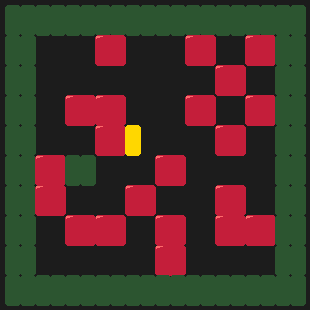

9021


In [13]:
i1 = """#######
#...#.#
#.....#
#..OO@#
#..O..#
#.....#
#######

<vv<<^^<<^^"""
i2 = """#######
#.....#
#.....#
#..O..#
#..O..#
#..@..#
#######

^^"""
i3 = """#######
#.....#
#.....#
#.O.O@#
#.....#
#.....#
#######

<<<"""
i4 = """#######
#.....#
#.....#
#@O.O.#
#.....#
#.....#
#######

>>>>"""

print(simulate_push_boxes2(input))